# Lab 1 - Medical Imaging

## Importing libraries

In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

## Loading data

In [7]:
x = loadmat('ct.mat')

# select variable 'im' and convert it from dictionary to numpy array
im = np.array(x['ct'])

# print image size
[rows, cols, slices] = im.shape
print(rows, cols, slices)

512 512 256


## Display images

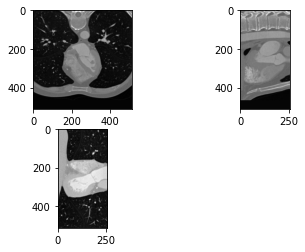

In [15]:
ax_slice = im[:,:,slices//2]
sag_slice = im[:, cols//2, :]
cor_slice = im[rows//2, :, :]


plt.figure("Mid Orthogonal Slices")
plt.subplot(2, 2, 1)
plt.imshow(ax_slice, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(sag_slice, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(cor_slice, cmap="gray")

1. Display a histogram of the CT image intensities (i.e. CT indexes), and then a histogram 
of the corresponding attenuation coefficients, by converting CT indexes to attenuation 
coefficients.

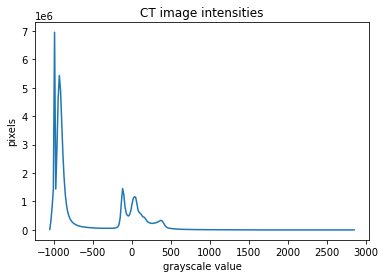

In [33]:
# create the histogram
histogram, bin_edges = np.histogram(im, bins=256)
# configure and draw the histogram figure
plt.figure()
plt.title("CT image intensities")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

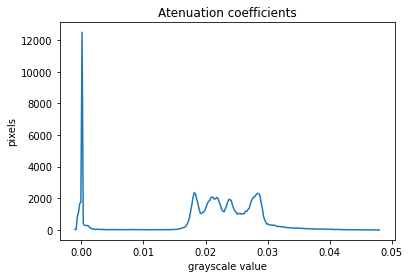

In [35]:
# create the histogram
mu_H2O = 0.0206
mu_ct = sag_slice*mu_H2O/1000 + mu_H2O
histogram, bin_edges = np.histogram(mu_ct, bins=256)
# configure and draw the histogram figure
plt.figure()
plt.title("Atenuation coefficients")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

2. Display 9 representative slices of the image of attenuation coefficients for each 
orientation - axial (x,y), sagittal (x,z) and coronal (y,z)

Text(0.5, 0.98, 'Axial plane')

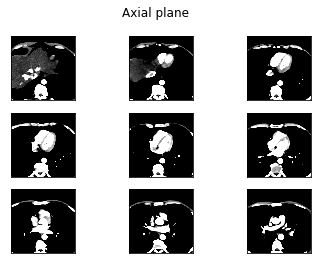

In [46]:
# Axial plane
slice_jump = slices//9

plt.figure('Showing Multiple Slices')
for n in range(1, 10):
    sl = 1 + (n-1)*slice_jump
    axsltmp = im[:, :, sl]
    plt.subplot(3, 3, n)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(axsltmp, cmap='gray', origin='lower', vmin=0, vmax=125)

plt.suptitle('Axial plane')

Text(0.5, 0.98, 'Axial plane')

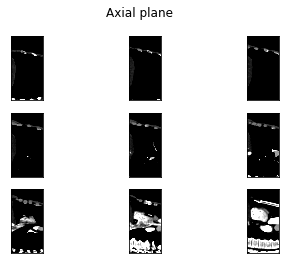

In [52]:
# Axial plane
slice_jump = slices//9

plt.figure('Showing Multiple Slices')
for n in range(1, 10):
    sl = 1 + (n-1)*slice_jump
    axsltmp = im[:, sl, :]
    plt.subplot(3, 3, n)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(axsltmp, cmap='gray', origin='lower', vmin=0, vmax=255)

plt.suptitle('Axial plane')